In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from collections import Counter
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import plot_confusion_matrix
from scipy import stats as stat_
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/2021_Fall/IDS 400_FinalProject

/content/drive/MyDrive/2021_Fall/IDS 400_FinalProject


In [ ]:
appData=pd.read_csv("FineTech_appData.csv")
appData.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [ ]:
appData.shape

(50000, 12)

In [ ]:
#appData.isnull().sum()

In [ ]:
percent_missing = appData.isnull().sum() * 100 / len(appData)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
user,0.000
first_open,0.000
dayofweek,0.000
hour,0.000
age,0.000
screen_list,0.000
numscreens,0.000
minigame,0.000
used_premium_feature,0.000
enrolled,0.000


In [ ]:
appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [ ]:
#appData.dtypes

In [ ]:
appData['hour']

0         02:00:00
1         01:00:00
2         19:00:00
3         16:00:00
4         18:00:00
           ...    
49995     13:00:00
49996     00:00:00
49997     22:00:00
49998     12:00:00
49999     01:00:00
Name: hour, Length: 50000, dtype: object

In [ ]:
#appData['hour'] = appData.hour.str.slice(1,3).astype(int)
appData['hour']

0         02:00:00
1         01:00:00
2         19:00:00
3         16:00:00
4         18:00:00
           ...    
49995     13:00:00
49996     00:00:00
49997     22:00:00
49998     12:00:00
49999     01:00:00
Name: hour, Length: 50000, dtype: object

In [ ]:
appData.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## Visualization

In [ ]:
#appData

In [ ]:
appVisual = appData[['user','dayofweek','hour','age','numscreens','minigame','used_premium_feature','enrolled','liked']]

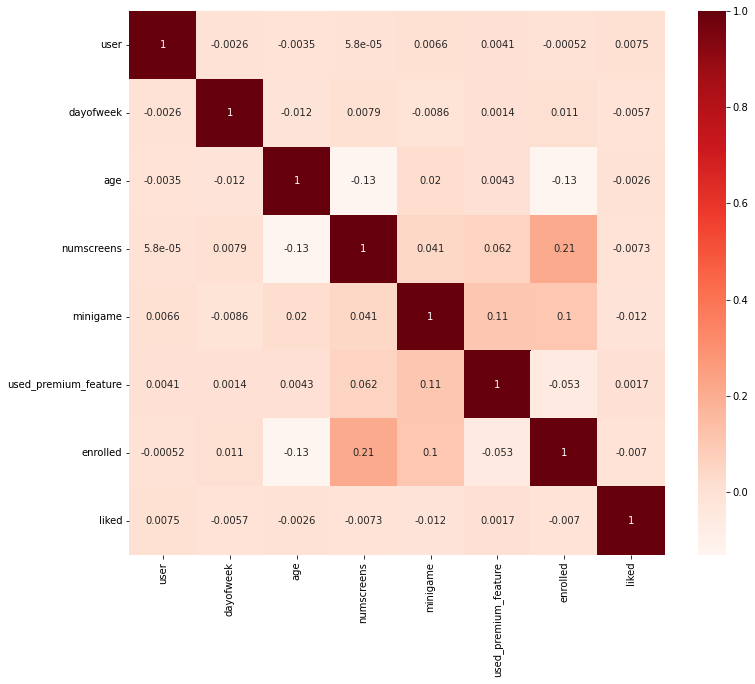

In [ ]:
# heatmap to find the corelation between the attributes w.r.t target variable

plt.figure(figsize=(12,10))
cor = appData.corr()
#cor = appVisual.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# we have found thet there is no strong corelation between any attributes.
# there is little corelation between numscreen and enrolled which mean those customer who enrolled for premimum app saw more screen
# and similarly between minigame and enrolled.
# there is slightly negative corelaton between age with enrolled and numscree which mean older customer do not enrolled for premium app and they don't see multiple screen


No. of Not-Enrolled user : 18926
No. of Enrolled user : 31074


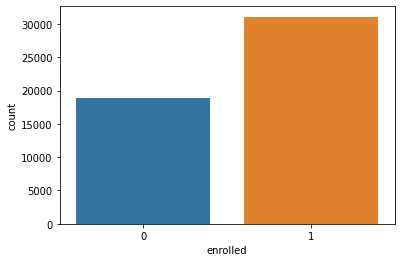

In [ ]:
# Count for enrolled
sns.countplot(appData.enrolled)
print("No. of Not-Enrolled user :", (appData.enrolled<1).sum())
print("No. of Enrolled user :", (appData.enrolled==1).sum())

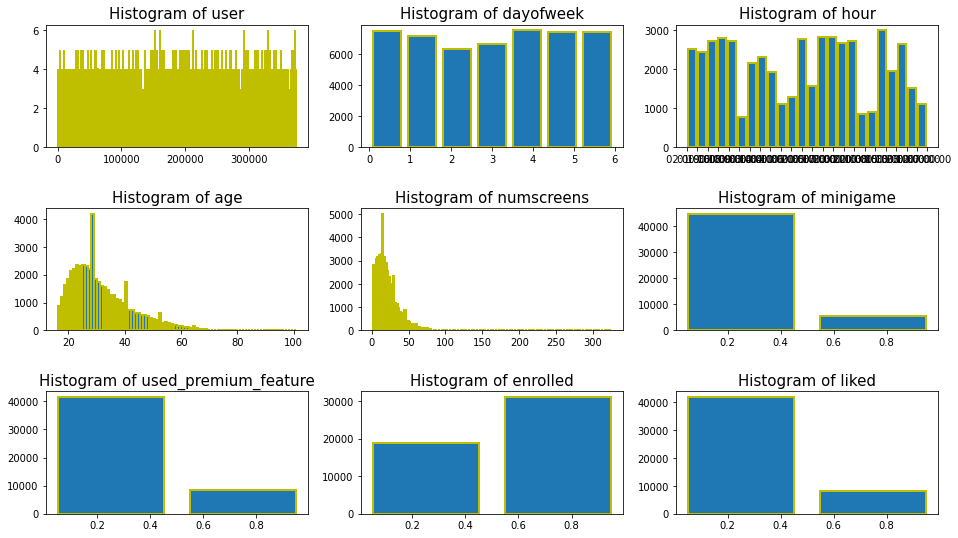

In [ ]:
# plot histogram 
 
plt.figure(figsize = (16,9))
features = appVisual.columns 
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) 
    plt.title("Histogram of {}".format(j), fontsize = 15) 
     
    bins = len(appVisual[j].unique()) 
    plt.hist(appVisual[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) 
     
plt.subplots_adjust(hspace=0.5) 

In [ ]:
from dateutil import parser

appData['first_open'] = pd.to_datetime(appData['first_open'])
appData['enrolled_date'] = pd.to_datetime(appData['enrolled_date'])

appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                            object
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [ ]:
appData['totaltime']=(appData.enrolled_date - appData.first_open).astype('timedelta64[h]')

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <a list of 10 Patch objects>)

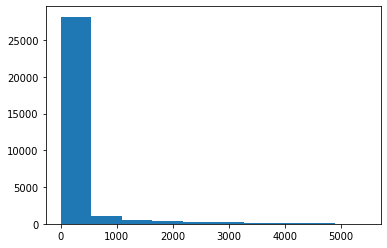

In [ ]:
plt.hist(appData['totaltime'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

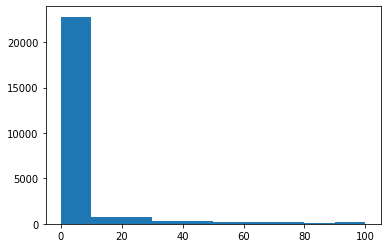

In [ ]:
# distribution of time taken to enroll
plt.hist(appData['totaltime'].dropna(),range=(0,100))

# maximum customer enroll within 10 hours after the registration 


##(new) feature selection

### ANOVA for numeric features

In [ ]:
Independent_features_num = [] # creating a list store independent numeric features

def ANOVATest_func(n):   
    # By grouping data by readmitted class for finding out the independent features
    l1 = appData.groupby('enrolled')[n].apply(list)
    # Calling function f_oneway from stat library to perform the ANOVA test
    res = stat_.f_oneway(*l1)
    print('Feature Name is: ', n)
    print('P-Value is: ', res[1])
    # interpret p-value
    alpha = 0.05
    if res[1] <= alpha:
        print('Dependent feature hence rejecting Ho for HA \n')
    else:
        print('Independent feature hence failing to reject Ho \n')
        Independent_features_num.append(n)
    return

numeric_col = appData.columns[appData.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
for col in numeric_col:
                ANOVATest_func(col)

if Independent_features_num:
    print('List of categorical Independent features: ', Independent_features_num)
else:
    print('No independent numeric feature exist')

Feature Name is:  user
P-Value is:  0.9075327157841578
Independent feature hence failing to reject Ho 

Feature Name is:  dayofweek
P-Value is:  0.011320040043771977
Dependent feature hence rejecting Ho for HA 

Feature Name is:  age
P-Value is:  4.192839946108148e-191
Dependent feature hence rejecting Ho for HA 

Feature Name is:  numscreens
P-Value is:  0.0
Dependent feature hence rejecting Ho for HA 

Feature Name is:  minigame
P-Value is:  1.6435580929569747e-122
Dependent feature hence rejecting Ho for HA 

Feature Name is:  used_premium_feature
P-Value is:  4.260509966644294e-32
Dependent feature hence rejecting Ho for HA 

Feature Name is:  enrolled
P-Value is:  0.0
Dependent feature hence rejecting Ho for HA 

Feature Name is:  liked
P-Value is:  0.11637102185348495
Independent feature hence failing to reject Ho 

Feature Name is:  totaltime
P-Value is:  nan
Independent feature hence failing to reject Ho 

List of categorical Independent features:  ['user', 'liked', 'totaltime'

In [ ]:
appData = appData.drop(columns=['user', 'liked','totaltime'])

## Feature Selection

In [ ]:
import math
def tosin(column):
  max_value = column.max()
  sin_values = [math.sin((2*math.pi*x)/max_value) for x in list(column)]
  return sin_values
def tocos(column):
  max_value = column.max()
  cos_values = [math.cos((2*math.pi*x)/max_value) for x in list(column)]
  return cos_values

In [ ]:
#tosin(appData["dayofweek"])

In [ ]:
#appData['date_sin'] = appData.apply(tosin(appData["dayofweek"]))

In [ ]:
category = pd.cut(appData.dayofweek,bins=[0,1,2,3,4,5,6,7] ,labels =[ '1','2','3','4','5','6','7'])
appData.insert(2,'day_of_week',category)

In [ ]:
#appData.drop(columns=['Age Group', 'dayofweek'],inplace=True)
appData.drop(columns=['dayofweek'],inplace=True)

In [ ]:
appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   first_open            50000 non-null  datetime64[ns]
 1   day_of_week           42485 non-null  category      
 2   hour                  50000 non-null  object        
 3   age                   50000 non-null  int64         
 4   screen_list           50000 non-null  object        
 5   numscreens            50000 non-null  int64         
 6   minigame              50000 non-null  int64         
 7   used_premium_feature  50000 non-null  int64         
 8   enrolled              50000 non-null  int64         
 9   enrolled_date         31074 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(5), object(2)
memory usage: 3.5+ MB


In [ ]:
#appData.loc[appData.totaltime > 48, 'enrolled']=0
appData.drop(columns = ['enrolled_date'], inplace=True)

In [ ]:
dataS= pd.read_csv('top_screens.csv').top_screens.values
dataS

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [ ]:
appData['screen_list'] = appData.screen_list.astype(str) + ','

In [ ]:
for name in dataS:
    appData[name] = appData.screen_list.str.contains(name).astype(int)
    appData['screen_list'] = appData.screen_list.str.replace(name +",", "")

In [ ]:
appData.shape

(50000, 67)

In [ ]:
appData

,first_open,day_of_week,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,Loan2,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,2012-12-27 02:14:51.273,3,02:00:00,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2013-03-19 19:19:09.157,1,19:00:00,23,,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-02-26 18:50:48.661,1,18:00:00,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2013-05-09 13:46:17.871,3,13:00:00,32,"Home,ScanPreview,VerifySSN,product_review,prod...",13,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
49996,2013-04-09 00:05:17.823,1,00:00:00,35,"Home,",4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,2013-04-28 12:33:04.288,6,12:00:00,27,"Home,product_review,product_review,product_rev...",26,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [ ]:
appData['remain_screen_list'] = appData.screen_list.str.count(",")


In [ ]:
appData.drop(columns = ['screen_list'], inplace=True)


In [ ]:
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
appData['saving_screens_count'] = appData[saving_screens].sum(axis = 1)
appData.drop(columns = saving_screens, inplace = True)

In [ ]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
appData['credit_screens_count'] = appData[credit_screens].sum(axis = 1)
appData.drop(columns = credit_screens, axis = 1, inplace = True)

In [ ]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
appData['cc_screens_count'] = appData[cc_screens].sum(axis = 1)
appData.drop(columns = cc_screens, inplace = True)


In [ ]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
appData['loan_screens_count'] = appData[loan_screens].sum(axis = 1)
appData.drop(columns = loan_screens, inplace = True)

In [ ]:
appData.shape

(50000, 49)

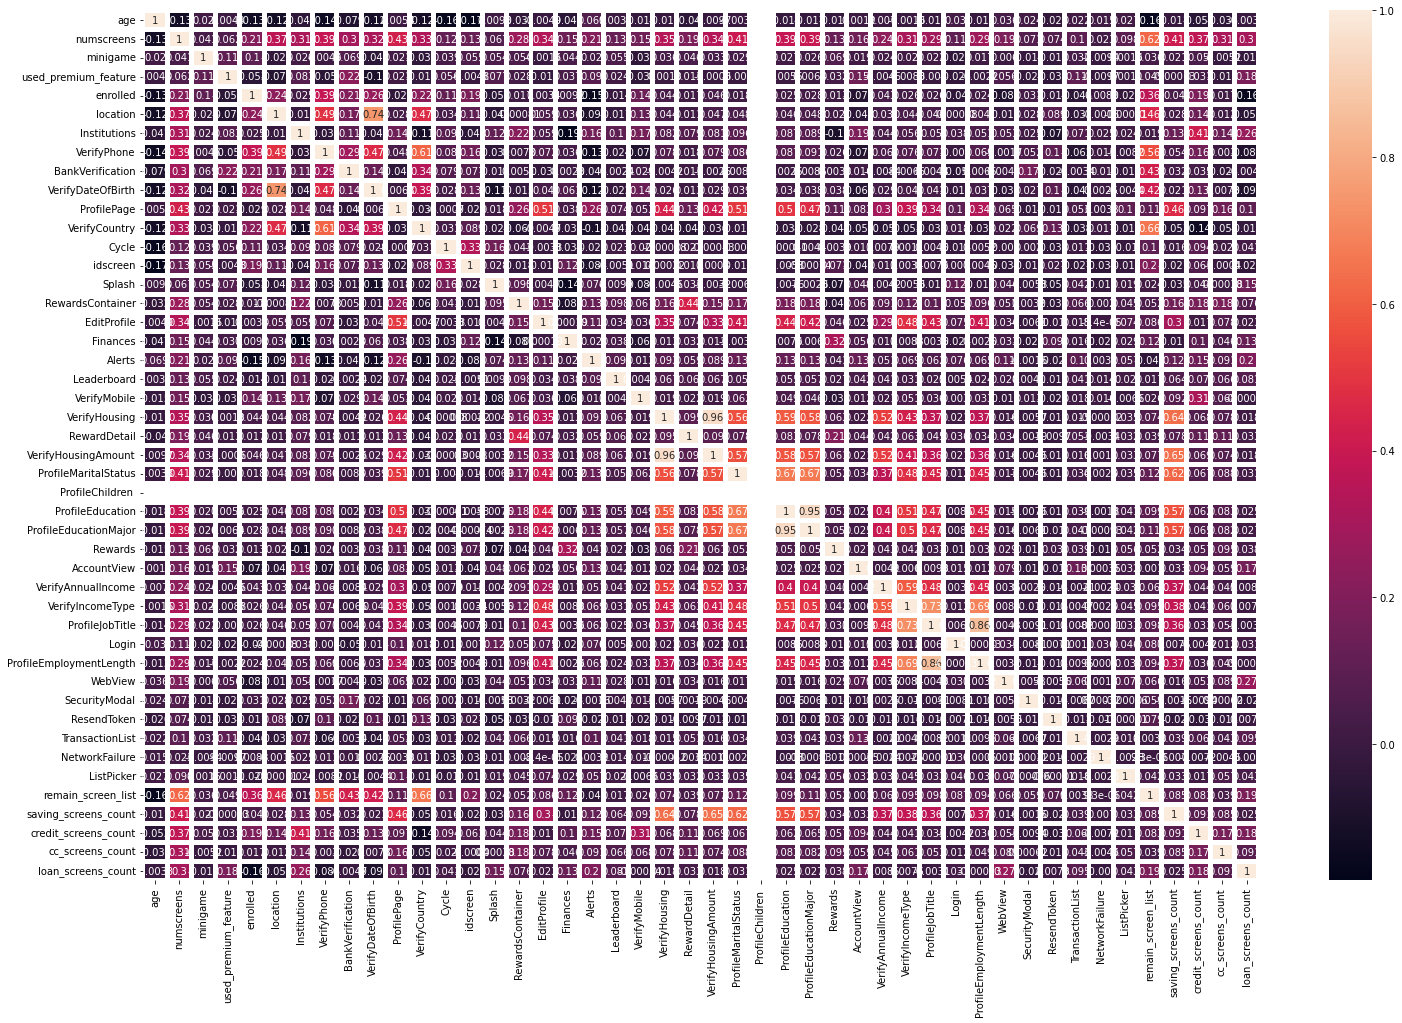

In [ ]:
plt.figure(figsize = (25,16)) 
sns.heatmap(appData.corr(), annot = True, linewidth =4)

In [ ]:
appData["first_open"] = pd.to_datetime(appData["first_open"])

In [ ]:
appData['first_month'] = appData["first_open"].dt.month

## Data Preprocessing

In [ ]:
appData

,first_open,day_of_week,hour,age,numscreens,minigame,used_premium_feature,enrolled,location,Institutions,...,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count,first_month
0,2012-12-27 02:14:51.273,3,02:00:00,23,15,0,0,0,0,0,...,0,0,0,0,7,0,0,0,1,12
1,2012-12-02 01:16:00.905,6,01:00:00,24,13,0,0,0,1,1,...,0,0,0,0,5,0,0,0,1,12
2,2013-03-19 19:19:09.157,1,19:00:00,23,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3
3,2013-07-05 16:08:46.354,4,16:00:00,28,40,0,0,1,1,0,...,0,0,0,0,6,0,3,0,1,7
4,2013-02-26 18:50:48.661,1,18:00:00,31,32,0,0,1,0,1,...,0,0,0,0,10,0,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2013-05-09 13:46:17.871,3,13:00:00,32,13,0,0,1,0,0,...,0,0,0,0,6,0,2,0,0,5
49996,2013-04-09 00:05:17.823,1,00:00:00,35,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,4
49997,2013-02-20 22:41:51.165,2,22:00:00,39,25,0,0,0,1,0,...,0,0,0,0,6,0,0,0,0,2
49998,2013-04-28 12:33:04.288,6,12:00:00,27,26,0,0,1,1,0,...,0,0,0,0,13,0,0,0,0,4


In [ ]:
df_dummies = pd.get_dummies(appData, prefix='day_of_week', prefix_sep='.',columns=['day_of_week'])
df_dummies = pd.get_dummies(df_dummies, prefix='first_month', prefix_sep='.',columns=['first_month'])
df_dummies = pd.get_dummies(df_dummies, prefix='hour', prefix_sep='.',columns=['hour'])
df_dummies=df_dummies.drop(["first_open"],1)
df_dummies.head()

,age,numscreens,minigame,used_premium_feature,enrolled,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,...,hour. 14:00:00,hour. 15:00:00,hour. 16:00:00,hour. 17:00:00,hour. 18:00:00,hour. 19:00:00,hour. 20:00:00,hour. 21:00:00,hour. 22:00:00,hour. 23:00:00
0,23,15,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,24,13,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,23,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,28,40,0,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,31,32,0,0,1,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
type(df_dummies)

pandas.core.frame.DataFrame

In [ ]:
appDataDP = df_dummies
Y = df_dummies['enrolled']
X = df_dummies.drop(columns = 'enrolled')
seed = 7

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed, shuffle=True)

In [ ]:
print("Xtrain dimensions: ",X_train.shape,"X_test dimensions: ",X_test.shape)

Xtrain dimensions:  (35000, 85) X_test dimensions:  (15000, 85)


In [ ]:
#Balancing the dataset using SMOTE
from imblearn.over_sampling import SMOTE
#One thing to note is new samples are only added to the traning set. This is to ensure that the model generalizes well on the unseen data
smt = SMOTE()
X_train,Y_train=smt.fit_resample(X_train,Y_train)

Class=1, n=21781 (50.000%)
Class=0, n=21781 (50.000%)


<BarContainer object of 2 artists>

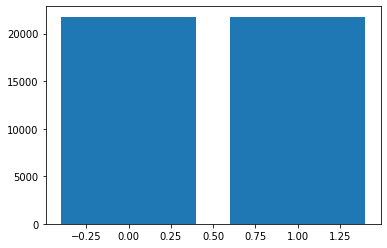

In [ ]:
#Viewing the distribution of the training data after using SMOTE
from collections import Counter
# summarize distribution
counter = Counter(Y_train)
for k,v in counter.items():
  per = v / len(Y_train) * 100
  print ('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter .keys(),counter.values())

#### If we are not trying to identify users

In [ ]:
#train_userID = X_train['user']
#X_train.drop(columns= 'user', inplace =True)
#test_userID = X_test['user']
#X_test.drop(columns= 'user', inplace =True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

logit_model = LogisticRegression(random_state = seed, penalty = 'l2')
logit_model.fit(X_train, Y_train)
Y_pred = logit_model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model.score(X_test, Y_test)))

0.7618666666666667
Accuracy of logistic regression classifier on test set: 0.76


In [ ]:
# train with Standard Scaling dataset
logit_model = LogisticRegression(random_state = seed, penalty = 'l2')
logit_model.fit(X_train_sc, Y_train)
Y_pred = logit_model.predict(X_test_sc)
print(accuracy_score(Y_test, Y_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model.score(X_test, Y_test)))

0.7685333333333333
Accuracy of logistic regression classifier on test set: 0.68


In [ ]:
logit_model=sm.Logit(Y,appDataDP)
result=logit_model.fit()
print(result.summary2())

## SVM

In [ ]:
# train with Standard Scaling dataset

svc_model2 = SVC()
svc_model2.fit(X_train_sc, Y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(Y_test, y_pred_svc_sc)

0.7896666666666666

Text(0.5, 1.0, 'Confussion Matrix')

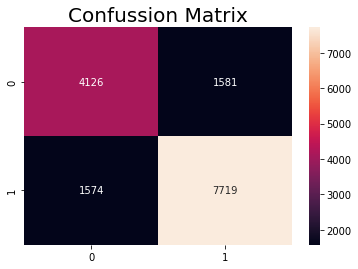

In [ ]:
cm_SVM = confusion_matrix(Y_test, y_pred_svc_sc)
sns.heatmap(cm_SVM, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)

## Random Forest

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)
 
accuracy_score(Y_test, y_pred_rf)

0.7750666666666667

In [ ]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, Y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(Y_test, y_pred_rf_sc)

0.7753333333333333

Text(0.5, 1.0, 'Confussion Matrix')

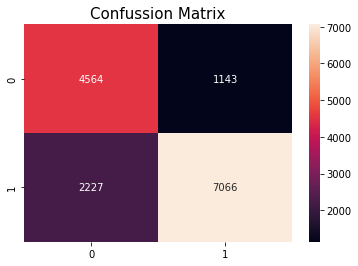

In [ ]:
cm_RF = confusion_matrix(Y_test, y_pred_rf_sc )
sns.heatmap(cm_RF, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 15)

# Additional experiment: Multiple Model

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold= model_selection.KFold(n_splits=10)
    cv_results= model_selection.cross_val_score(model, X_train_sc, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.767150 (0.004420)
LDA: 0.766800 (0.004784)
KNN: 0.734000 (0.003288)
CART: 0.700850 (0.007791)
NB: 0.714225 (0.005542)
SVM: 0.777975 (0.007165)
